# STA 141B: Homework 5
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Zhihao

Last Name: Meng

Student ID: 915537642

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Housing data

In this assignment, you'll analyze a collection of data sets from the [San Francisco Open Data Portal](http://data.sfgov.org/) and [Zillow](https://www.zillow.com/). The data sets have been stored in the SQLite database `sf_data.sqlite`, which you can [download here](http://anson.ucdavis.edu/~nulle/sf_data.sqlite). The database contains the following tables:

Table                   | Description
----------------------- | -----------
`crime`                 | Crime reports dating back to 2010.
`mobile_food_locations` | List of all locations where mobile food vendors sell.
`mobile_food_permits`   | List of all mobile food vendor permits. More details [here](https://data.sfgov.org/api/views/rqzj-sfat/files/8g2f5RV4PEk0_b24iJEtgEet9gnh_eA27GlqoOjjK4k?download=true&filename=DPW_DataDictionary_Mobile-Food-Facility-Permit.pdf).
`mobile_food_schedule`  | Schedules for mobile food vendors.
`noise`                 | Noise complaints dating back to August 2015.
`parking`               | List of all parking lots.
`parks`                 | List of all parks.
`schools`               | List of all schools.
`zillow`                | Zillow rent and housing statistics dating back to 1996. More details [here](https://www.zillow.com/research/data/).

The `mobile_food_` tables are explicitly connected through the `locationid` and `permit` columns. The other tables are not connected, but you may be able to connect them using dates, latitude/longitude, or postal codes.

Shapefiles for US postal codes are available [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html). These may be useful for converting latitude/longitude to postal codes.

Shapefiles for San Francisco Neighborhoods are available [here](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4).

__Exercise 1.1.__ (20 pts) Which mobile food vendor(s) sells at the most locations?

In [54]:
import sqlite3 as sql
import pandas as pd

In [55]:
db = sql.connect('/ucdavis/lecture/STA141B/141b-hw5--Zhihao2018/sf_data.sqlite')

In [56]:
food_loc = pd.read_sql("SELECT * FROM mobile_food_locations",db).dropna()
food_per = pd.read_sql("SELECT * FROM mobile_food_permits",db)
food_sch = pd.read_sql("SELECT * FROM mobile_food_schedule",db)

In [4]:
#Create a table to count the location.
db.execute("CREATE TABLE locidper AS SELECT locationid, permit,COUNT(*) AS count FROM mobile_food_schedule GROUP BY locationid") 

In [52]:
#db.execute("DROP TABLE locidper")

In [7]:
#Join the table mobile_food_location and mobile_food_permits by the column locationid.
db.execute("CREATE TABLE mobile_food_locidper AS SELECT L.locationid, R.* FROM locidper AS L INNER JOIN mobile_food_permits AS R ON L.permit = R.permit")

In [53]:
#db.execute("DROP TABLE mobile_food_locidper")

In [21]:
#Select the trunks which have been approved
db.execute("CREATE TABLE approve AS SELECT * FROM mobile_food_locidper WHERE Status = 'APPROVED'")

In [8]:
#db.execute("DROP TABLE approve")

In [22]:
db.execute("CREATE TABLE loc_count AS SELECT locationid,permit,Applicant,COUNT(locationid) AS num FROM approve GROUP BY permit")

In [9]:
#db.execute("DROP TABLE loc_count")

In [57]:
pd.read_sql("SELECT permit,Applicant,MAX(num) FROM loc_count",db)

permit        Applicant  MAX(num)
0  16MFF-0051  Park's Catering        23

__Exercise 1.2.__ (40 pts) Ask and use the database to analyze 5 questions about San Francisco. For each question, write at least 150 words and support your answer with plots. Make a map for at least 2 of the 5 questions.

You should try to come up with some questions on your own, but these are examples of reasonable questions:

* Which parts of the city are the most and least expensive?
* Which parts of the city are the most dangerous (and at what times)?
* Are noise complaints and mobile food vendors related?
* What are the best times and places to find food trucks?
* Is there a relationship between housing prices and any of the other tables?

Please make sure to clearly state each of your questions in your submission.

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import osmnx as ox
import shapely.geometry as geom

In [59]:
postcode = gpd.read_file("cb_2016_us_zcta510_500k/cb_2016_us_zcta510_500k.shp")
sfo = gpd.read_file("SF Find Neighborhoods/geo_export_b90f6349-9fa6-4740-ae5f-dba458ee365b.shp")

In [60]:
postcode.head()

ZCTA5CE10      AFFGEOID10 GEOID10    ALAND10  AWATER10  \
0     21914  8600000US21914   21914    1924479    477175   
1     01001  8600000US01001   01001   29731610   2118827   
2     34736  8600000US34736   34736  322808220  78588518   
3     46151  8600000US46151   46151  530632048   9804480   
4     48039  8600000US48039   48039   59592687   4845242   

                                            geometry  
0  POLYGON ((-75.99444799999999 39.567742, -75.99...  
1  POLYGON ((-72.667677 42.045022, -72.657715 42....  
2  (POLYGON ((-81.806163 28.568643, -81.801577999...  
3  (POLYGON ((-86.398562 39.320829, -86.398125999...  
4  POLYGON ((-82.61060000000001 42.724669, -82.51...

In [61]:
sfo.head()

link                    name  \
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...                Seacliff   
1                                               None             Lake Street   
2                  http://www.nps.gov/prsf/index.htm  Presidio National Park   
3                                               None        Presidio Terrace   
4  http://www.sfgate.com/neighborhoods/sf/innerri...          Inner Richmond   

                                            geometry  
0  POLYGON ((-122.4934552679999 37.78351817100008...  
1  POLYGON ((-122.4871507149999 37.78378542700005...  
2  POLYGON ((-122.4775801709999 37.81099311300005...  
3  POLYGON ((-122.4724105299999 37.78734653900005...  
4  POLYGON ((-122.4726257899999 37.78631480600006...

Question 1

In [62]:
zillow = pd.read_sql("SELECT * FROM zillow",db)

In [63]:
zillow.head()

RegionName                 Date  ZriPerSqft_AllHomes  \
0       94109  2010-11-01 00:00:00                3.156   
1       94110  2010-11-01 00:00:00                2.566   
2       94122  2010-11-01 00:00:00                2.168   
3       94080  2010-11-01 00:00:00                1.666   
4       94112  2010-11-01 00:00:00                2.322   

   MedianSoldPricePerSqft_AllHomes  PriceToRentRatio_AllHomes  \
0                         675.1913                      19.14   
1                         599.6785                      18.10   
2                         495.4432                      17.99   
3                         369.5538                      18.31   
4                         422.4538                      14.44   

   Turnover_AllHomes  
0             6.0771  
1             5.4490  
2             2.4198  
3             3.8757  
4             3.1288

In [15]:
price = pd.read_sql("SELECT AVG(MedianSoldPricePerSqft_AllHomes) AS avg, RegionName FROM zillow GROUP BY RegionName",db)

In [64]:
price[price['avg']==max(price['avg'])]

avg  RegionName
3  1336.128581       94104

In [65]:
price[price['avg']==min(price['avg'])]

avg  RegionName
19  297.008046       94124

In [66]:
highest=postcode[np.int64(postcode['ZCTA5CE10'])==np.int64(94104)]
lowest=postcode[np.int64(postcode['ZCTA5CE10'])==np.int64(94124)]

In [68]:
sfo_streets = ox.graph_from_place("San Francisco", network_type = "drive")

In [69]:
nodes, edges = ox.graph_to_gdfs(sfo_streets)

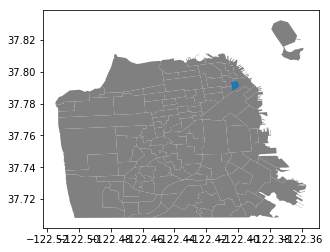

In [70]:
ax = sfo.plot(color = "grey")
highest.plot(ax = ax)
plt.show()

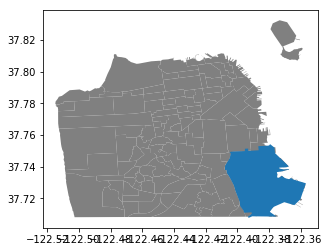

In [71]:
ax = sfo.plot(color = "grey")
lowest.plot(ax = ax)
plt.show()

The TABLE zillow contains the price information of houses in San Francisco. I select the column MedianSoldPricePerSqft_AllHomes	as the criterion of verify the most  and least expensive areas in San Francisco. And the postcode database privide the coordinates of latitude and longitude according to the zip codes. First, I find the zip codes most and least expensive areas in San Fancisco using the TABLE zillow and the functions max and min. Then I connect the zip codes to the postcode dataframe and find the coordinates of latitude and longitude of the most and least expensive areas. Finally, I plot them using the sfo dataframe which contaions the coordinates of latitude and longitude of every area in San Francisco according to the zip codes. In other words, I plot the most and least expensive areas on the map of San Francisco. 

From the two plots above, we can see that the most expensive area is at the northeast of San Francisco. The least expensive area is at the southeast of San Francisco. 

Question 2

In [72]:
crime = pd.read_sql("SELECT * FROM crime",db)
crimetime = crime['Datetime']

In [73]:
crime.head()

IncidntNum         Category                                   Descript  \
0   150060275     NON-CRIMINAL                              LOST PROPERTY   
1   150098210          ROBBERY                      ROBBERY, BODILY FORCE   
2   150098210          ASSAULT       AGGRAVATED ASSAULT WITH BODILY FORCE   
3   150098210  SECONDARY CODES                          DOMESTIC VIOLENCE   
4   150098226        VANDALISM  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   

  DayOfWeek             Datetime  PdDistrict Resolution  \
0    Monday  2015-01-19 14:00:00     MISSION       NONE   
1    Sunday  2015-02-01 15:45:00  TENDERLOIN       NONE   
2    Sunday  2015-02-01 15:45:00  TENDERLOIN       NONE   
3    Sunday  2015-02-01 15:45:00  TENDERLOIN       NONE   
4   Tuesday  2015-01-27 19:00:00    NORTHERN       NONE   

                       Address         Lon        Lat  
0        18TH ST / VALENCIA ST -122.421582  37.761701  
1  300 Block of LEAVENWORTH ST -122.414406  37.784191  
2  300 Block of LEAVENWORTH ST -122.414406  37.784191  
3  300 Block of LEAVENWORTH ST -122.414406  37.784191  
4       LOMBARD ST / LAGUNA ST -122.431119  37.800469

In [74]:
#Drop the date off from the elements in the column Datetime
Time=[]
for i in range(0,len(crimetime)):
    daytime = crimetime[i].split(' ',1)[1]
    Time.append(daytime)
Time = pd.DataFrame(Time)
Time.columns = ['Time']

In [75]:
crime["Time"]=Time.iloc[:,0]

In [29]:
#Insert a new column Time to the TABLE crime.
crime.copy().to_sql('crimetime',db)

In [28]:
#db.execute("DROP TABLE crimetime")

In [43]:
#Drop the duplicated cases
db.execute("CREATE TABLE exactcrime AS SELECT IncidntNum,DayOfWeek,Time,PdDistrict,Lon,Lat FROM crimetime GROUP BY IncidntNum")

In [42]:
#db.execute("DROP TABLE exactcrime")

In [95]:
#Count the crimes by PdDistrict, DayOfWeek and Time.
db.execute("CREATE TABLE Districtnum AS SELECT *,COUNT(PdDistrict) AS count FROM exactcrime GROUP BY PdDistrict,DayOfWeek,Time")

In [94]:
#db.execute("DROP TABLE Districtnum")

In [76]:
pd.read_sql("SELECT *,MAX(count) AS max FROM Districtnum",db)

IncidntNum DayOfWeek      Time PdDistrict         Lon        Lat  count  \
0   176044687  Saturday  23:00:00   SOUTHERN -122.422375  37.770719    706   

   max  
0  706

In [77]:
District = pd.read_sql("SELECT * FROM exactcrime WHERE DayOfWeek='Saturday' AND Time='23:00:00'",db)

In [78]:
District.head()

IncidntNum DayOfWeek      Time  PdDistrict         Lon        Lat
0   100006304  Saturday  23:00:00  TENDERLOIN -122.416916  37.784394
1   100006570  Saturday  23:00:00   INGLESIDE -122.421243  37.740440
2   100007017  Saturday  23:00:00   INGLESIDE -122.440948  37.725820
3   100007506  Saturday  23:00:00     CENTRAL -122.408365  37.798575
4   100007540  Saturday  23:00:00     MISSION -122.411426  37.752602

In [79]:
lonlat = [geom.Point(x) for x in zip(District.Lon, District.Lat)]

In [80]:
District = gpd.GeoDataFrame(District, geometry = lonlat)

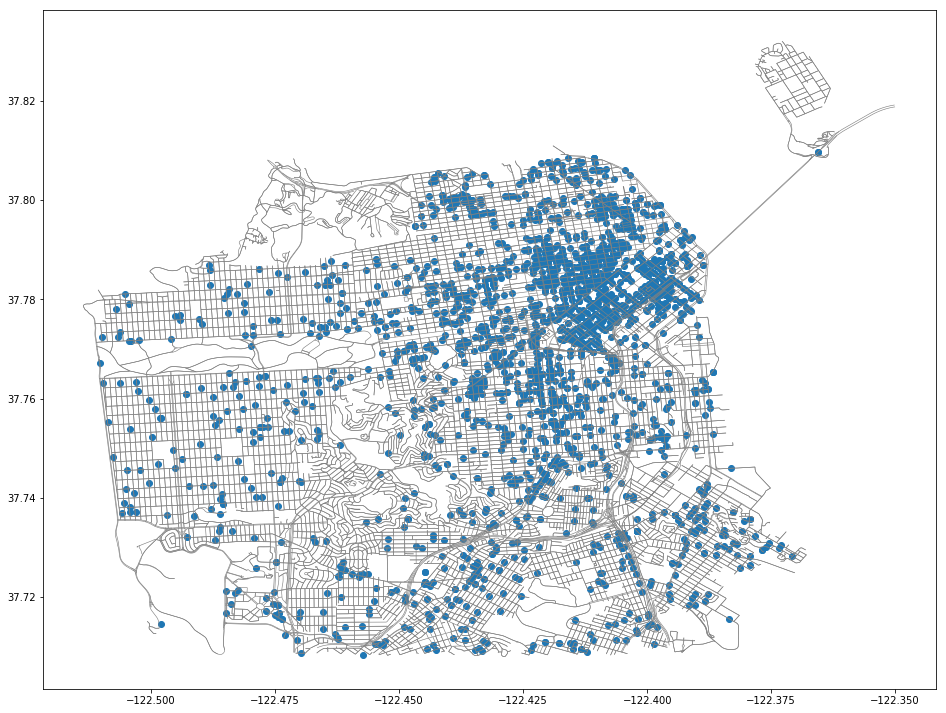

In [81]:
ax = edges.plot(color = "gray", linewidth = 0.6, figsize = (16, 16))
District.plot(ax = ax)
plt.show()

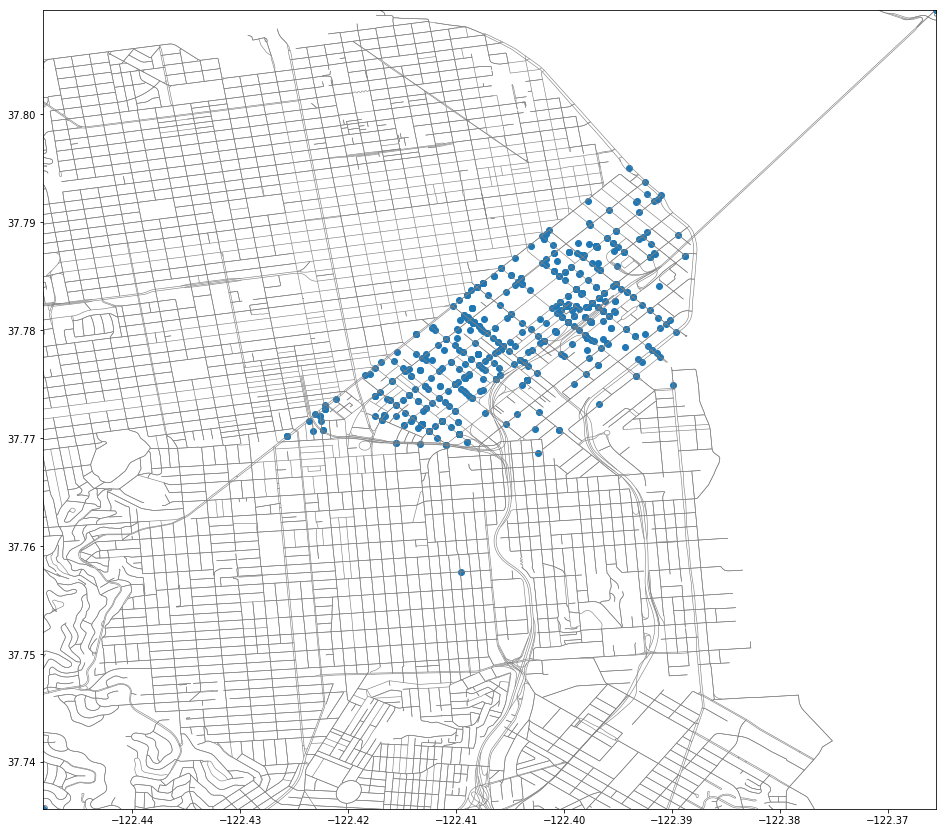

In [82]:
District1=District[District['PdDistrict']=="SOUTHERN"]
ax = edges.plot(color = "gray", linewidth = 0.6, figsize = (16, 16))
District1.plot(ax = ax)
ax.set_xlim([min(District1.Lon), max(District1.Lon)])
ax.set_ylim([min(District1.Lat), max(District1.Lat)])
plt.show()

The TABLE crime contains the crime reports of every day and every time. First, I make some changes on the column Datetime. I drop the dates and only reserve the times of every crime reprots because I think dates have no meanings for my analysis. Second, there are repeated crime reports in the dataframe and I drop all the duplicated cases according to the column IncidnNum. Third, I count the number of crimes of every districts and group the data by DateOfWeek,Times and PdDistricts, then I get the number of crimes for every district,weekday and time. The location and time of the maximum number of crimes is SOUTHERN at 23:00 on Saturday, where there are 706 crimes for these years in total.

Therefore, the most dangerous place is SOUTHERN and the most dangerous time is 23:00 on Saturday. The first plot above is the place of every crimes occured at 23:00, Saturday. We can see that most of them occured at the northeast of San Francisco. The second plot above is the cirmes occured at SOUTHERN at 23:00, Saturday.

Question 3

In [83]:
noise = pd.read_sql("SELECT * FROM noise",db).dropna()

In [84]:
noise.head()

CaseID                           Type  \
1  6446138    amplified_sound_electronics   
2  5929789          other_excessive_noise   
3  5659943          other_excessive_noise   
4  5930704          other_excessive_noise   
5  6427526  construction_private_property   

                                        Address     Neighborhood  \
1  Intersection of CLINTON PARK and GUERRERO ST  Mission Dolores   
2       1301 48TH AVE, SAN FRANCISCO, CA, 94122     Outer Sunset   
3  736 LEAVENWORTH ST, SAN FRANCISCO, CA, 94109   Lower Nob Hill   
4       1360 43RD AVE, SAN FRANCISCO, CA, 94122     Outer Sunset   
5    108 VIRGINIA AVE, SAN FRANCISCO, CA, 94110   Bernal Heights   

              Datetime        Lat         Lon  
1  2016-10-21 13:20:18  37.769148 -122.424475  
2  2016-06-01 11:38:59  37.762047 -122.508365  
3  2016-03-13 01:18:27  37.787983 -122.414943  
4  2016-06-01 13:58:43  37.761385 -122.502232  
5  2016-10-17 07:28:37  37.742435 -122.420087

In [85]:
lonlat1 = [geom.Point(x) for x in zip(noise.Lon, noise.Lat)]

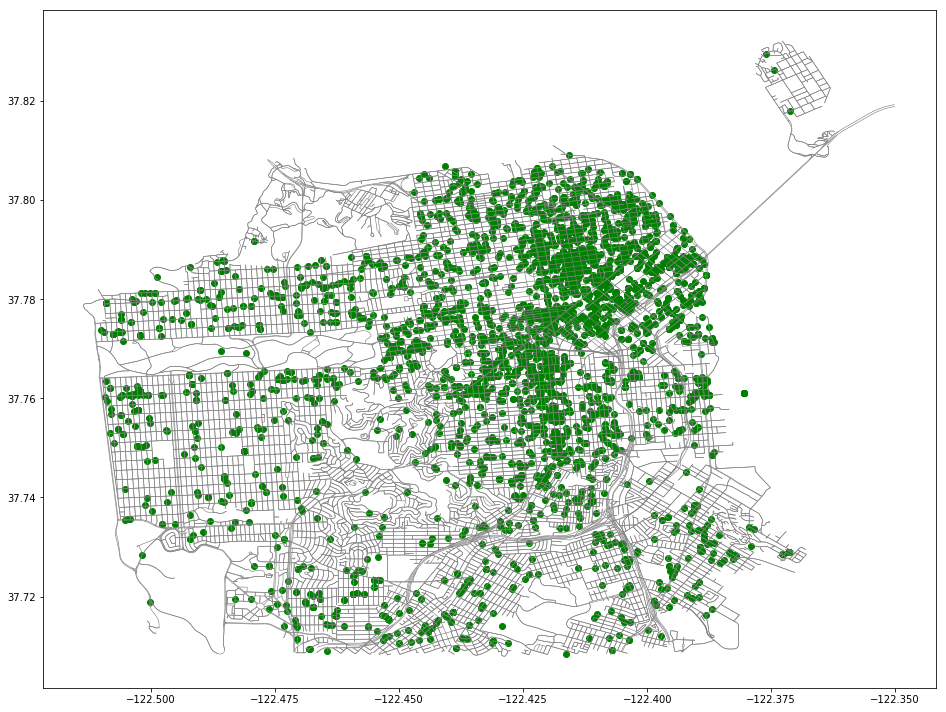

In [86]:
noise = gpd.GeoDataFrame(noise, geometry = lonlat1)
ax = edges.plot(color = "gray", linewidth = 0.6, figsize = (16, 16))
noise.plot(ax = ax,color = "green")
plt.show()

In [87]:
food_loc.head()

locationid                                LocationDescription  \
0      762182        TOWNSEND ST: 05TH ST to 06TH ST (400 - 499)   
1      437211      MISSOURI ST: 20TH ST to SIERRA ST (500 - 630)   
2      765880    17TH ST: SAN BRUNO AVE to UTAH ST (2200 - 2299)   
3      765690  CESAR CHAVEZ ST: EVANS AVE to KANSAS ST (2100 ...   
4      751253        FOLSOM ST: 14TH ST to 15TH ST (1800 - 1899)   

                Address   Latitude   Longitude  
0       444 TOWNSEND ST  37.774871 -122.398532  
1       555 MISSOURI ST  37.759304 -122.395902  
2          2222 17TH ST  37.765216 -122.406007  
3  2323 CESAR CHAVEZ ST  37.748801 -122.400552  
4        1800 FOLSOM ST  37.767852 -122.416105

In [88]:
lonlat2 = [geom.Point(x) for x in zip(food_loc.Longitude, food_loc.Latitude)]

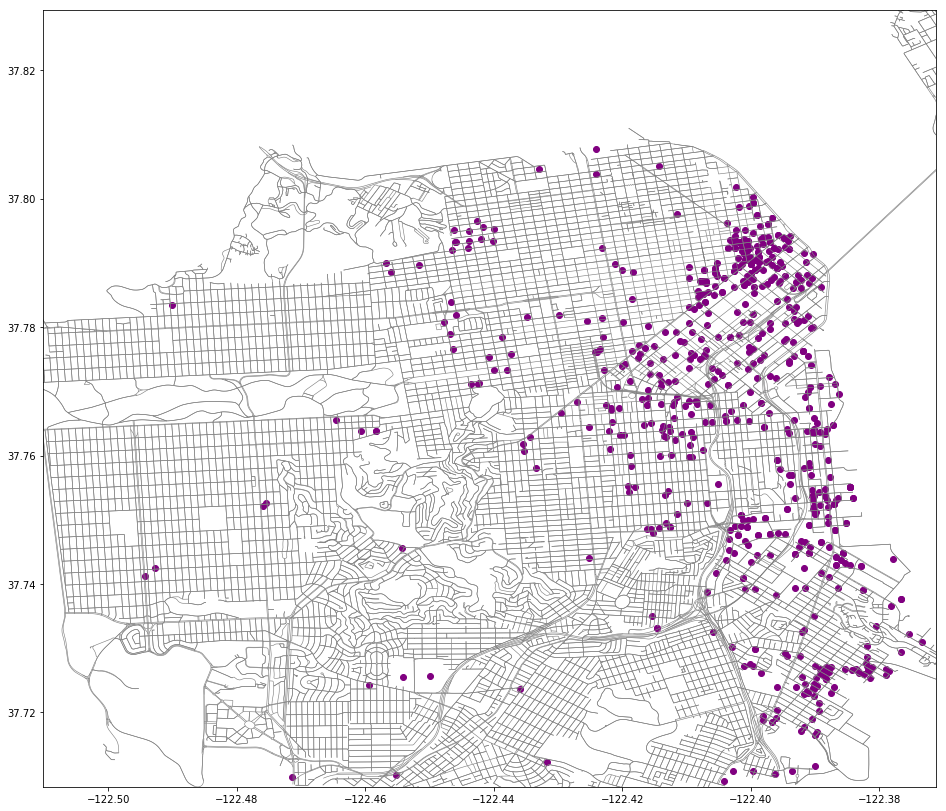

In [89]:
food_loc = gpd.GeoDataFrame(food_loc, geometry = lonlat2)
ax = edges.plot(color = "gray", linewidth = 0.6, figsize = (16, 16))
food_loc.plot(ax = ax,color = "purple")
ax.set_xlim([min(noise.Lon), max(noise.Lon)])
ax.set_ylim([min(noise.Lat), max(noise.Lat)])
plt.show()

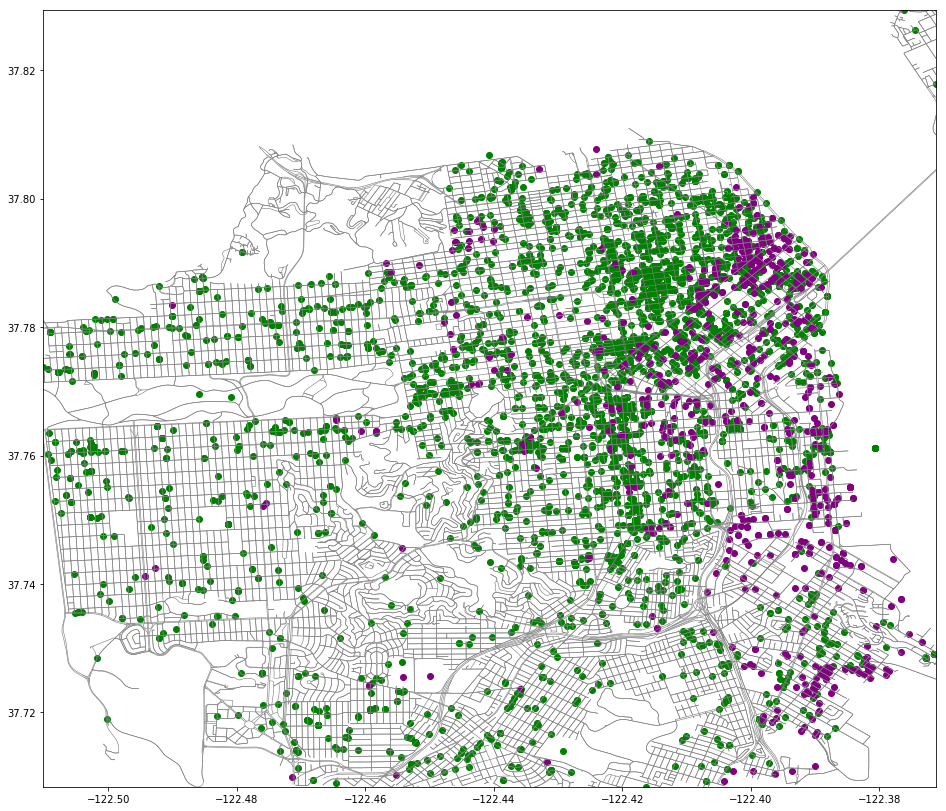

In [90]:
ax = edges.plot(color = "gray", linewidth = 0.6, figsize = (16, 16))
noise.plot(ax = ax,color = "green")
food_loc.plot(ax = ax,color = "purple")
ax.set_xlim([min(noise.Lon), max(noise.Lon)])
ax.set_ylim([min(noise.Lat), max(noise.Lat)])
plt.show()

The TABLE noise contains the noise data which I name as noise and the TABLE mobile_food_locatioin contains the data of the locations of food trunks which I name as food_loc. I transfer the dataframes noise and food_loc to geodataframes and plot them. The first plot above is the noise plot. We can see that the noises distribute around the city but the density of noises is the highest at the northeastern of the city. The second plot above is the food_loc plot. We can see that the food trunks mainly distribute at the east of the city espeacilly at the northeastern part. From the third plot, we can find that there are few relations between the noises and the locations of food trunks because the area where the density of noises is the high is not same as the area where the density of food trunks is the high. The food trunks is only one of reasons of noises and not the main reason of noises because noises distribute nearly the whole city but most of food trunks are at the eastern part of the city.

Question 4

In [91]:
food_sch.head()

locationid      permit DayOfWeek  EndHour  StartHour
0      305727  11MFF-0040        Mo       15         10
1      305727  11MFF-0040        Tu       15         10
2      305727  11MFF-0040        We       15         10
3      305727  11MFF-0040        Th       15         10
4      305727  11MFF-0040        Fr       15         10

In [132]:
#Count the trunks by the column DayofWeek,EndHour and StartHour.
db.execute("CREATE TABLE Timenum AS SELECT DayOfWeek,EndHour,StartHour,COUNT(DayOfWeek) AS count FROM mobile_food_schedule GROUP BY DayOfWeek, EndHour, StartHour")

In [131]:
#db.execute("DROP TABLE Timenum")

In [92]:
pd.read_sql("SELECT * ,MAX(count) FROM Timenum",db)

DayOfWeek  EndHour  StartHour  count  MAX(count)
0        Mo       10          9    105         105

In last question, I have plotted the location of food trunks. From the plot in last part, we can find that the best places to find food trunks is the northeastern part of the city. To be concrete, it is about in the area of latitudet between 37.76 and 37.80 and longitude between -122.44 and -122.38. 

The TABLE mobile_food_schedule contains the data of schedules of food trunks which I name as food_sch. I count the column DayOfWeek and group by DayOfWeek, EndHour and StartHour. The time of the maximum number of food trunks is 9:00am to 10:00am on Monday. There are 105 food trunks in total during this time period. 

Therefore, the best time to find food trunks is 9:00am to 10:00am, Monday and the best places to find food trunks is in the area of latitude between 37.76 and 37.80 and longitude between -122.44 and -122.38, which is at the northeastern part of the city.

Question 5

In [93]:
parking = pd.read_sql("SELECT * FROM parking",db)
lonlat3 = [geom.Point(x) for x in zip(parking.Lon, parking.Lat)]
parking = gpd.GeoDataFrame(parking, geometry = lonlat3)

In [94]:
parking.head()

Owner                    Address PrimeType SecondType GarOrLot  \
0     Private             2110 Market St       PPA                   L   
1       SFMTA                993 Potrero       PPA                   L   
2  Port of SF  601 Terry A Francois Blvd       PPA                   L   
3     Private          11 SOUTH VAN NESS       PHO        CPO        G   
4     Private          101 CALIFORNIA ST       PPA                   G   

   RegCap  ValetCap  MCCap    LandType        Lat         Lon  \
0      13         0      0  restaurant  37.767378 -122.429344   
1      34         0      0              37.757272 -122.406320   
2      72         0      0              37.770135 -122.385801   
3     130         0      0              37.774150 -122.418402   
4     250         0      0              37.793243 -122.397495   

                        geometry  
0  POINT (-122.429344 37.767378)  
1   POINT (-122.40632 37.757272)  
2  POINT (-122.385801 37.770135)  
3   POINT (-122.418402 37.77415)  
4  POINT (-122.397495 37.793243)

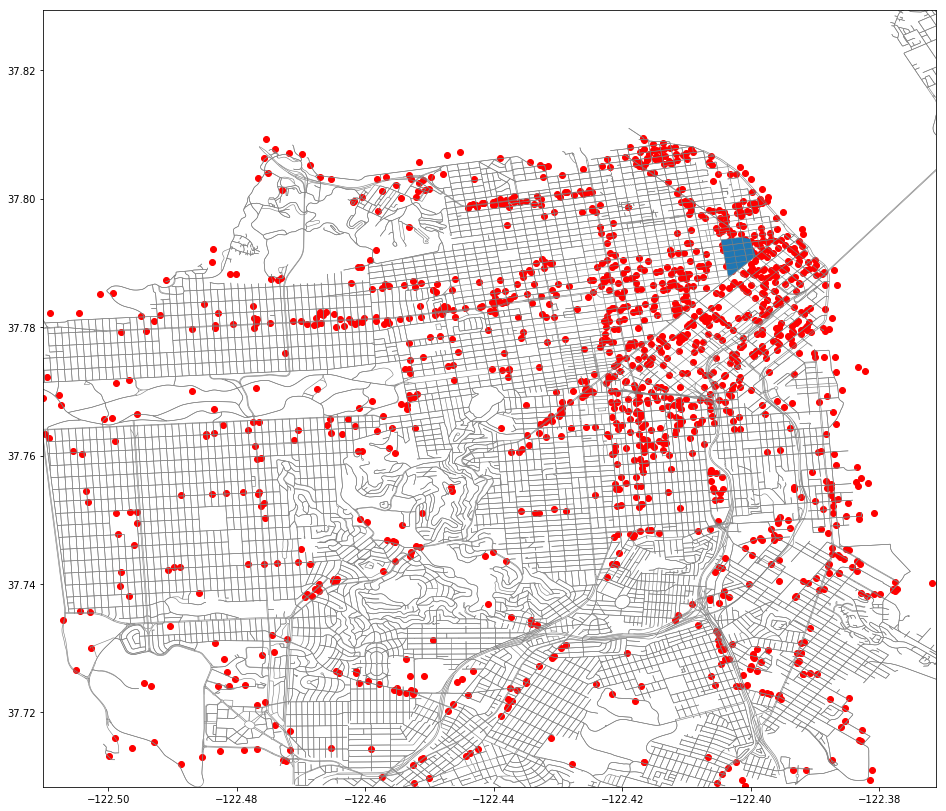

In [95]:
ax = edges.plot(color = "gray", linewidth = 0.6, figsize = (16, 16))
parking.plot(ax = ax,color = "red")
highest.plot(ax = ax)
ax.set_xlim([min(noise.Lon), max(noise.Lon)])
ax.set_ylim([min(noise.Lat), max(noise.Lat)])
plt.show()

In [96]:
schools = pd.read_sql("SELECT * FROM schools",db)
lonlat4 = [geom.Point(x) for x in zip(schools.Lon, schools.Lat)]
schools = gpd.GeoDataFrame(schools, geometry = lonlat4)

In [97]:
schools.head()

Name Entity  LowerGrade  UpperGrade GradeRange  \
0         Alamo Elementary School  SFUSD           0           5        K-5   
1      Alvarado Elementary School  SFUSD           0           5        K-5   
2             Aptos Middle School  SFUSD           6           8        6-8   
3  Argonne Early Education School  SFUSD          -2           0      PK-TK   
4       Argonne Elementary School  SFUSD           0           5        K-5   

         Category  LowerAge  UpperAge GeneralType  \
0  USD Grades K-5         5        10          PS   
1  USD Grades K-5         5        10          PS   
2  USD Grades 6-8        11        13          PS   
3     USD PreK/TK         3         5          PS   
4  USD Grades K-5         5        10          PS   

                                    Address        Lat         Lon  \
0     250 23RD AVE, San Francisco, CA 94121  37.783005 -122.482300   
1  625 DOUGLASS ST, San Francisco, CA 94114  37.753681 -122.438194   
2    105 APTOS AVE, San Francisco, CA 94127  37.729672 -122.465782   
3     750 16TH AVE, San Francisco, CA 94118  37.773968 -122.474060   
4     680 18TH AVE, San Francisco, CA 94121  37.775307 -122.476311   

                                 geometry  
0  POINT (-122.4822998 37.78300479999999)  
1         POINT (-122.4381943 37.7536812)  
2         POINT (-122.4657822 37.7296715)  
3         POINT (-122.4740601 37.7739677)  
4         POINT (-122.4763107 37.7753067)

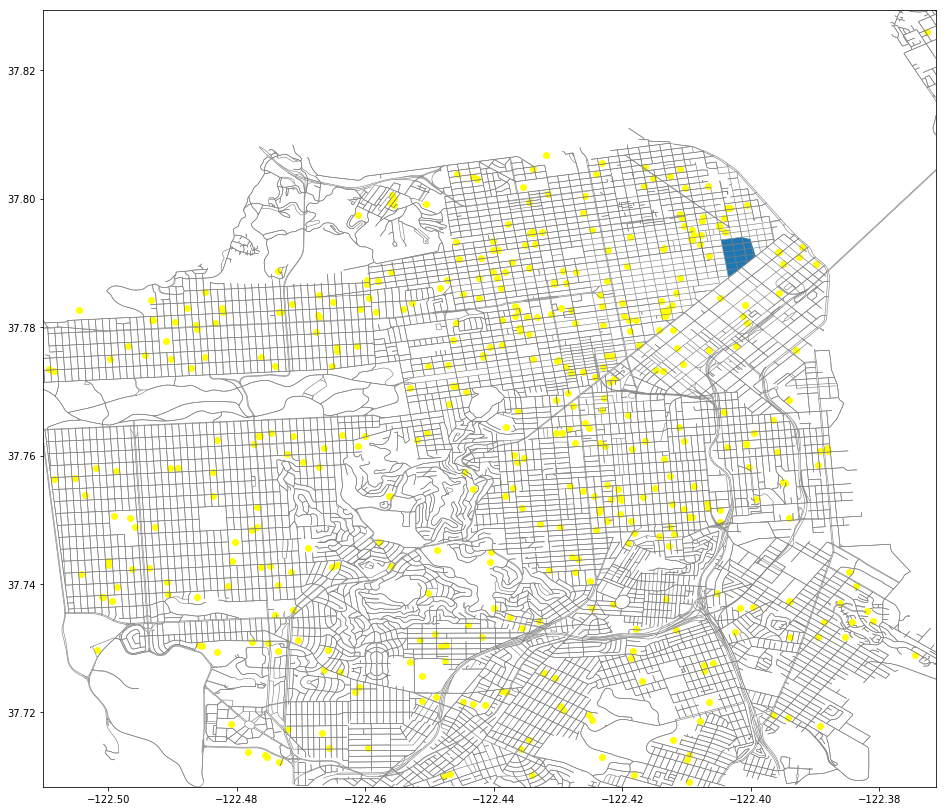

In [98]:
ax = edges.plot(color = "gray", linewidth = 0.6, figsize = (16, 16))
schools.plot(ax = ax,color = "yellow")
highest.plot(ax = ax)
ax.set_xlim([min(noise.Lon), max(noise.Lon)])
ax.set_ylim([min(noise.Lat), max(noise.Lat)])
plt.show()

I want to find if there are relationships between house prices and parkings and house prices and schools. The TABLE parkings contains the data of parking lots which I name as parking. The TABLE schools contains data of schools which I name as schools. The first plot above is the distribution of parking lots and the area with highest house prices. We can see that the area with highest house prices is exactly at the area where the density of parking lots is the highest. Therefore, we can say that there is a significant relationship between house prices and parking lots. The areas owning more parking lots will have higher house prices. 

The second plot above is the distribution of schools and the area with highest house prices. We can see that the schools distribute nearly uniformly among the city. So there are few relationships between house prices and the distribution of schools.

In [99]:
db.close()